## 생존분석 예제
- 카플란 마이어
- 로그 순위 검정
- 콕스 회귀 분석

로그 순위 검정 통계량: 0.2308
P-value: 0.6310


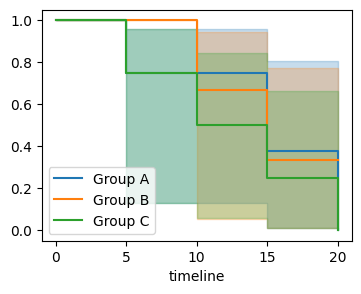

In [10]:
# 필요한 라이브러리를 가져옵니다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# 예시 데이터 생성
data = pd.DataFrame({
    'time': [5, 10, 15, 20, 5, 10, 15, 20, 5, 10, 15, 20],
    'event': [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1],
    'group': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C']
})

# Kaplan-Meier 생존 곡선 추정
kmf = KaplanMeierFitter()
groups = data['group'].unique()
for group in groups:
    group_data = data[data['group'] == group]
    kmf.fit(group_data['time'], event_observed=group_data['event'], label=f'Group {group}')
    kmf.plot(figsize=(4,3))

# 로그 순위 검정 (Log-Rank Test)
results = logrank_test(data[data['group'] == 'A']['time'], 
                       data[data['group'] == 'B']['time'], 
                       event_observed_A=data[data['group'] == 'A']['event'], 
                       event_observed_B=data[data['group'] == 'B']['event'])
print(f"로그 순위 검정 통계량: {results.test_statistic:.4f}")
print(f"P-value: {results.p_value:.4f}")

In [6]:
data

,time,event,group
0,5,1,A
1,10,0,A
2,15,1,A
3,20,1,A
4,5,0,B
5,10,1,B
6,15,1,B
7,20,0,B
8,5,1,C
9,10,1,C


### 콕스 회귀 분석
- load_rossi
    - 변수 설명
        - week: 관찰 기간 동안 경과한 주 수 (Duration, 생존 시간)
        - arrest: 재범 여부 (1: 재범 발생, 0: 재범 미발생)
        - fin: 금융 지원 여부 (1: 지원 받음, 0: 지원 받지 않음)
        - age: 나이 (나이)
        - paro: 조기 출소 여부 (1: 조기 출소, 0: 조기 출소 아님)
        - mar: 결혼 여부 (1: 결혼, 0: 결혼하지 않음)
        - wexp: 경력 여부 (1: 경력 있음, 0: 경력 없음)
        - paro.1: 조기 출소 여부 (동일한 값)
        - prio: 이전 범죄 기록의 범죄 점수 (이전 범죄 기록의 심각성을 나타내는 값)
        - educ: 교육 수준 (교육 수준을 나타내는 값)

In [14]:
# 필요한 라이브러리를 가져옵니다.
import pandas as pd
from lifelines import CoxPHFitter

# 예제 데이터 불러오기
from lifelines.datasets import load_rossi
data = load_rossi()
print(data.head())

   week  arrest  fin  age  race  wexp  mar  paro  prio
0    20       1    0   27     1     0    0     1     3
1    17       1    0   18     1     0    0     1     8
2    25       1    0   19     0     1    0     1    13
3    52       0    1   23     1     1    1     1     1
4    52       0    0   19     0     1    0     1     3


In [15]:
# 콕스 회귀 모델 생성
cph = CoxPHFitter()

# 모델 학습
cph.fit(data, duration_col='week', event_col='arrest')

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>

In [16]:
# 모델 요약 정보 출력
cph.print_summary()

TypeError: format() got an unexpected keyword argument 'precision'

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2023-09-14 05:33:56 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
fin        -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age        -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race        0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp       -0.15       0.86       0.21            -0.57             0.27                 0.57                 1.30
mar        -0.43       0.65       0.38            -1.18             0.31                 0.31                 1.37
paro       -0.08       0.92       0.20            -0.47             0.30                 0.63                 1.35
prio        0.09       1.10       0.03             0.04             0.15                 1.04                 1.16

            cmp to     z      p   -log2(p)
covariate                                 
fin           0.00 -1.98   0.05       4.40
age           0.00 -2.61   0.01       6.79
race          0.00  1.02   0.31       1.70
wexp          0.00 -0.71   0.48       1.06
mar           0.00 -1.14   0.26       1.97
paro          0.00 -0.43   0.66       0.59
prio          0.00  3.19 <0.005       9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

- Concordance는 0에서 1 사이의 값을 가지며 다음과 같이 해석됩니다:

    - Concordance가 1에 가까울수록 모델의 예측이 관찰된 사건 발생 순서와 완벽하게 일치합니다. 이는 모델이 매우 우수하게 사건 발생을 예측한다는 것을 나타냅니다.
    - Concordance가 0.5라면 모델의 예측이 무작위와 같으며, 아무런 예측 능력이 없다는 것을 의미합니다.
    - Concordance가 0에 가까울수록 모델의 예측이 관찰된 사건 발생 순서와 반대로 일치합니다. 이는 모델이 예측을 역으로 하거나 엉뚱한 예측을 한다는 것을 나타냅니다.
    
- 해석
    - 금융 지원을 받은 범죄자(fin = 1)가 재범 여부에 대해 금융 지원을 받지 않은 범죄자(fin = 0)보다 낮은 위험을 가지고 있다. 즉, 금융 지원을 받은 범죄자들이 재범할 가능성이 상대적으로 낮다.
    - 범죄자의 나이가 한 살 증가할 때마다 재범 여부에 대한 위험이 약간 감소한다고 해석할 수 있다. 즉, 나이가 많은 범죄자가 재범할 가능성이 약간 더 낮다.
    - 결혼한 범죄자(mar =1)가 재범 여부에 대해 결혼하지 않은 범죄자(mar =0)보다 낮은 위험을 가지고 있다. 즉, 결혼한 범죄자들이 재범할 가능성이 상대적으로 낮다.

In [21]:
data.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
